In [18]:
# Import necessary libraries
import pandas as pd

In [19]:
file_path = 'HR-Data.csv'
df = pd.read_csv(file_path)

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


C:\Users\naman\AppData\Local\Temp\ipykernel_18692\948582971.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_normalized[col], label=col, linewidth=2)
C:\Users\naman\AppData\Local\Temp\ipykernel_18692\948582971.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_normalized[col], label=col, linewidth=2)


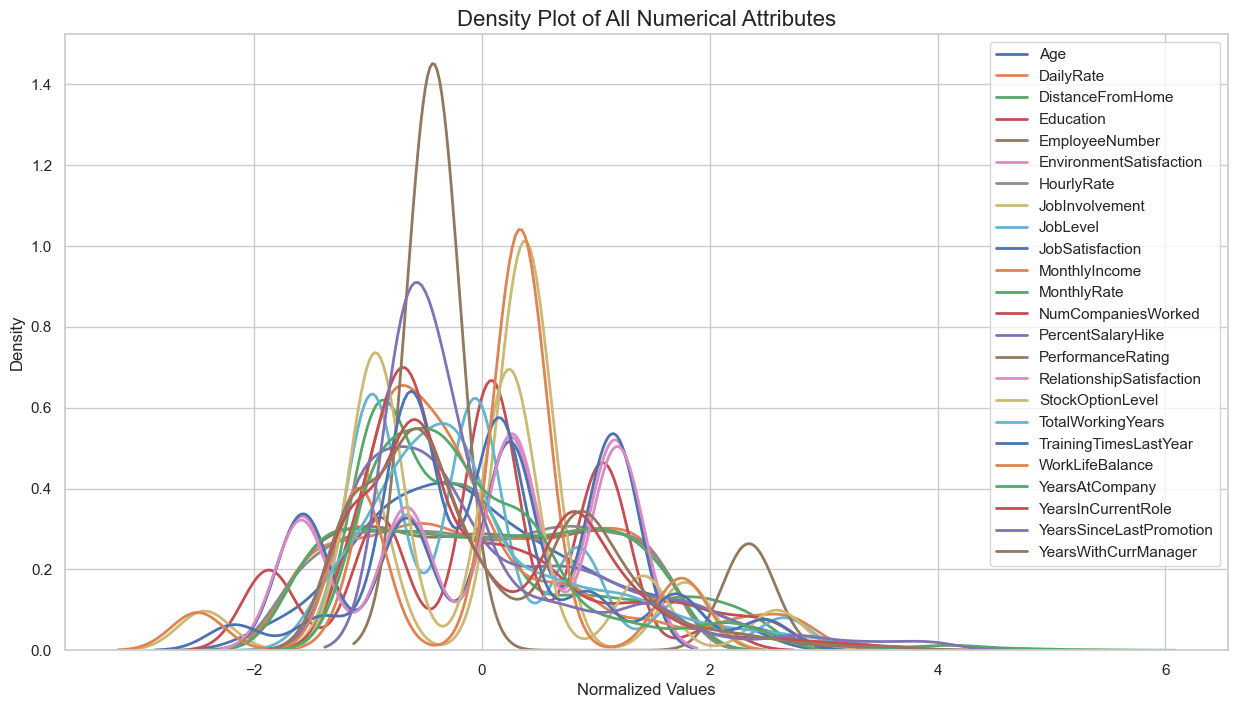

In [20]:
import matplotlib.pyplot as plt

# Normalizeing the numerical columns 
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_normalized = df[num_cols].apply(lambda x: (x - x.mean()) / x.std())

# Plot all numerical
plt.figure(figsize=(15, 8))

for col in num_cols:
    sns.kdeplot(df_normalized[col], label=col, linewidth=2)

plt.title('Density Plot of All Numerical Attributes', fontsize=16)
plt.xlabel('Normalized Values', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend()
plt.show()

## visualizing the distribution of all numerical attributes on a single density plot (KDE) after normalizing them, helping us understand the overall spread, shape, and overlap of different features before training or preprocessing, which can reveal potential outliers, skewness, and the need for scaling.

## preprocessing the data

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# Check and handling missing values for numerical columns using the median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Converting categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Feature scaling for numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,False,False,False,False,False,True,False,False,True,True
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,False,False,False,False,True,False,False,True,False,False
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,True,False,False,False,False,False,False,False,True,True
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,False,False,False,False,True,False,False,True,False,True
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,True,False,False,False,False,False,False,True,False,False


In [33]:
# Features (X) and target (y)
X = df.drop('Attrition_Yes', axis=1)  # Drop the target column from the feature set
y = df['Attrition_Yes']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1249, 47)
X_test shape: (221, 47)
y_train shape: (1249,)
y_test shape: (221,)


# Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# classif report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.8507
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.96      0.91       184
        True       0.60      0.32      0.42        37

    accuracy                           0.85       221
   macro avg       0.74      0.64      0.67       221
weighted avg       0.83      0.85      0.83       221

Confusion Matrix:
[[176   8]
 [ 25  12]]


In [37]:
import pandas as pd
import joblib  # To load the trained model

# Load the test data
test_data = pd.read_csv('employee_test_data.csv')

# Display the test data
print("Test Data:")
print(test_data)

# Load the trained model (replace 'your_model_file.pkl' with the actual model filename)
model_filename = 'your_model_file.pkl'  # Update this with your actual model filename
model = joblib.load(model_filename)

# Make predictions
predictions = model.predict(test_data)

# Add predictions to the test data
test_data['Predicted_Leave'] = predictions

# Display the predictions
print("\nPredictions:")
print(test_data[['Age', 'DistanceFromHome', 'MonthlyIncome', 'Predicted_Leave']])


The employee is likely to stay with the company.
